In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(0)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


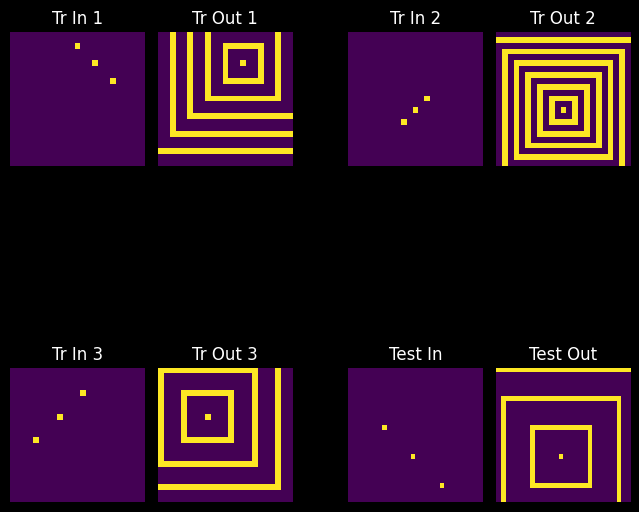

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.3-pattern_based",
    compress_knowledge=False,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import (logic_concept_reasoning_network,
                            pattern_based_logical_reasoning_network)

reasoning_iterations=4
reasoning_agent=lambda prompt,input: pattern_based_logical_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
reasoning_agent=None
set_live_verbosity(0)

n = 150
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)


Starting Epoch 1



Training:   0%|          | 0/150 [00:00<?, ?it/s]Delete of nonexisting embedding ID: 900602eb-fd77-440d-91da-23cd8f046c9d
Delete of nonexisting embedding ID: 35be4c56-32d7-430d-889a-55adf7d9cecf
Delete of nonexisting embedding ID: ab94673c-c961-4f71-8061-0e272945b25c
Delete of nonexisting embedding ID: 7ef6171f-2be3-4b81-aa18-bed27804aa9a
Delete of nonexisting embedding ID: d68167c1-0d62-44f5-a2be-9f3635d96db5
Delete of nonexisting embedding ID: b8889f69-ee16-4070-a19e-9c38fe8d3825
Delete of nonexisting embedding ID: c3f6db60-d7f7-4f5b-b8a7-9ecd738c3f9c
Delete of nonexisting embedding ID: 97f8aba2-41e2-4972-a376-76a9fb496f2a
Delete of nonexisting embedding ID: 451b824a-254f-4d94-b22e-138bfeccfae0
Delete of nonexisting embedding ID: 28d6d6bc-e578-4796-8782-69a4111c35c3
Delete of nonexisting embedding ID: 9c5bb597-0aae-41e6-b42e-766f351579a2
Delete of nonexisting embedding ID: 950badc8-86d0-4b5c-8c5d-7f9d8ef1f142
Delete of nonexisting embedding ID: a7877d5e-9f95-4d6a-bea5-67eb133e54d5
De

In [ ]:
print(train_dtw_scores, test_dtw_scores)

In [ ]:
#10#[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []
#20#[26.68332812825267, [10.723805294763608], [26.90724809414742], [0.0], [0.0], [26.267851073127396], [13.379088160259652], [0.0], [0.0], [0.0], [22.627416997969522], [0.0], [0.0], [14.798648586948742], [0.0], [0.0], [16.46207763315433], [24.372115213907882], [32.0], [0.0]] []
#1#[0.0] []
#20#[0.0, [0.0], [0.0], [2.449489742783178], [0.0], [9.848857801796104], [6.244997998398398], [5.0990195135927845], [7.54983443527075], [19.544820285692065], [3.872983346207417], [13.114877048604], [8.48528137423857], [0.0], [0.0], [6.164414002968976], [8.366600265340756], [19.131126469708992], [24.166091947189145], [5.0]] []
#21#[0.0, [0.0], [0.0], [10.908712114635714], [0.0], [11.661903789690601], [18.947295321496416], [10.63014581273465], [4.898979485566356], [0.0], [5.656854249492381], [8.717797887081348], [16.0], [42.14261501141095], [0.0], [48.52834223420371], [0.0], [0.0], [22.693611435820433], [5.656854249492381], [0.0]] []
#10 (only OA)#[4.795831523312719, [0.0], [7.0710678118654755], [0.0], [0.0], [8.426149773176359], [23.664319132398465], [30.066592756745816], [0.0], [4.58257569495584]] []
#10 (with logical patter)#[8.426149773176359, [3.0], [12.489995996796797], [17.320508075688775], [3.4641016151377544], [6.0], [6.6332495807108], [4.123105625617661], [0.0], [14.696938456699069]] []
#20 #[25.865034312755125, [9.797958971132712], [21.2602916254693], [0.0], [0.0], [15.7797338380595], [1.7320508075688772], [7.483314773547883], [41.8568990729127], [6.082762530298219], [5.0], [0.0], [0.0], [2.8284271247461903], [0.0], [22.0], [8.48528137423857], [10.723805294763608], [9.486832980505138], [28.600699292150182], [8.06225774829855]] []

In [ ]:
mlu.print_knowledge_base()